# Try It Yourself

最后一组练习只有三个问题，但它们都非常棘手，所以要保持警惕！


In [1]:
from learntools.core import binder; binder.bind(globals())

In [2]:
from learntools.python.ex7 import *
print('Setup complete.')

Setup complete.


首先解压learntools-master压缩包到notebook的工作目录，如果此处仍然不能正确输出setup complete，那么可以参考文档learntools 安装解决

# 1.

在完成列表和元组的练习后，有人注意到，根据他的`estimate_average_slot_payout`函数功能，机器是可以反操纵主人呢，因此也许从长远看是有利益可图的。


从口袋里的200美元开始，吉米已经玩了500次老虎机，每次玩完后都会将他的新余额记录在列表中。他使用Python的“matplotlib”库来绘制他的余额随时间变化的图表：

<AxesSubplot:>

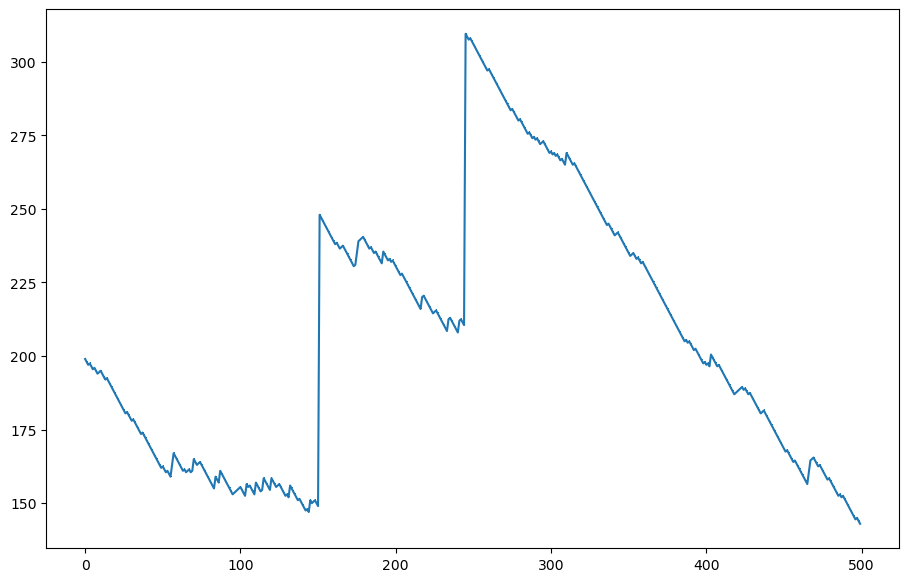

In [3]:
# Import the jimmy_slots submodule
from learntools.python import jimmy_slots
# Call the get_graph() function to get Jimmy's graph
graph = jimmy_slots.get_graph()
graph

In [4]:
type(graph)

matplotlib.axes._subplots.AxesSubplot

In [5]:
dir(graph)

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

她最近运气很差，你可以帮他把图做的更为清晰一些。

1.添加title "Results of 500 slot machine pulls"
2. 让y轴从0开始 . 
3. 给y轴添加标签 "Balance" 

调用`type(graph)`，你发现他的类型是 `matplotlib.axes._subplots.AxesSubplot`. 这是一个新的类型. 通过调用 `dir(graph)`, 你可以发现三个有用的方法可以被使用 `.set_title()`, `.set_ylim()`, and `.set_ylabel()`. 

使用这些方法根据上面的3点需求，完成这个函数 `prettify_graph` . 我们已经给展示了第一个需求，也就是添加title。

(如果你不知道某个方法怎么用，记得 `help()` 函数可以告诉你!)

<AxesSubplot:title={'center':'Results of 500 slot machine pulls'}>

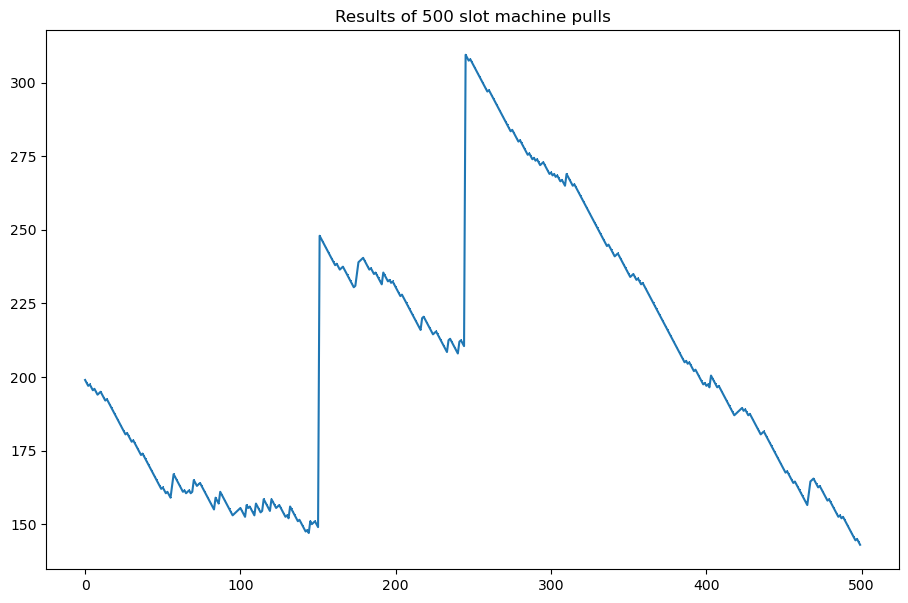

In [7]:
def prettify_graph(graph):
    """1.添加title "Results of 500 slot machine pulls" 
    2. 让y轴从0开始 . 
    3. 给y轴添加标签 "Balance"
    """
    graph.set_title("Results of 500 slot machine pulls")
    # Complete steps 2 and 3 here

graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph

**Bonus:** 
奖励：你能在 y 轴上格式化数字，使它们看起来像美元金额吗？例如 200 美元，而不仅仅是 200 美元。

我们不会告诉你如何完成这个任何，你可以使用`dir(graph)` and/or `help(graph)`来发掘出来可以使用的方法。


In [9]:
# 请自己完成，不要查询答案
q1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
def prettify_graph(graph):
    graph.set_title("Results of 500 slot machine pulls")
    # Make the y-axis begin at 0
    graph.set_ylim(bottom=0)
    # Label the y-axis
    graph.set_ylabel("Balance")
    # Bonus: format the numbers on the y-axis as dollar amounts
    # An array of the values displayed on the y-axis (150, 175, 200, etc.)
    ticks = graph.get_yticks()
    # Format those values into strings beginning with dollar sign
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    # Set the new labels
    graph.set_yticklabels(new_labels)
```

# 2. <span title="Spicy" style="color: coral">🌶️🌶️</span>

这是一个非常具有挑战性的问题。不要忘记您可以收到提示！

ly 打算分析数据来确定一个能赢得比赛的最好时机。他有一些下面类似的数据，是一个字典格式：


    [
        {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
        {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
        # Sometimes the racer's name wasn't recorded
        {'name': None, 'items': ['mushroom',], 'finish': 2},
        {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
    ]

`'items'` 是所有赛车收集的东西,  `'finish'` 是赛车再比赛中的平台。 (1 for first place, 3 for third, etc.).

He wrote the function below to take a list like this and return a dictionary mapping each item to how many times it was picked up by first-place finishers.
他写了一个函数，返回一个字典类型，记录的是再1平台的赛车再比赛中收集的物品的个数，比如{‘mushroomm‘：2}表示某个再1号平台的赛车再比赛中收集了两次mushroom。

In [11]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts


他做了一些测试，得到了好像正确的结果：

In [12]:
sample = [
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]
best_items(sample)

{'green shell': 2, 'mushroom': 1}

但是当他把这个函数应用再所有数据上面的时候，出现了这样的错误 `TypeError`.

你知道为什么吗？
运行下面的代码框，查看错误信息，找到bug并修改它。

提示，如果有需要，你可以参考，开始讨论import的时候，遇到过类似的问题，(https://www.kaggle.com/colinmorris/working-with-external-libraries)

In [26]:
print(type(1+1))

<class 'int'>


In [37]:
# Import luigi's full dataset of race data
from learntools.python.luigi_analysis import full_dataset

# Fix me!
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        print(type(i))
        if racer['name'] is None:
            #print(i+1,len(racers),racer['name'])
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name']))

    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)

<class 'int'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>


TypeError: can only concatenate str (not "int") to str

In [25]:
for i in range(len(full_dataset)):#注意上面的函数i的类型为什么会是str呢？
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [15]:
full_dataset#可以查看里面的内容，推测程序发生问题的地方，并解决它。

[{'name': 'Peach',
  'items': ['green shell', 'banana', 'green shell'],
  'finish': 3},
 {'name': 'Peach',
  'items': ['green shell', 'banana', 'green shell'],
  'finish': 1},
 {'name': 'Bowser', 'items': ['green shell'], 'finish': 1},
 {'name': None, 'items': ['green shell'], 'finish': 2},
 {'name': 'Bowser', 'items': ['green shell'], 'finish': 1},
 {'name': None, 'items': ['red shell'], 'finish': 1},
 {'name': 'Yoshi', 'items': ['banana', 'blue shell', 'banana'], 'finish': 7},
 {'name': 'DK', 'items': ['blue shell', 'star'], 'finish': 1}]

请修正函数，并得到没有error输出的运行结果

In [40]:
# 请修改--------------------------
#----------------------------------
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        print(type(i))
        if racer['name'] is None:
            #print(i+1,len(racers),racer['name'])
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name']))

    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)

<class 'int'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>


TypeError: can only concatenate str (not "int") to str

# 3. <span title="A bit spicy" style="color: darkgreen ">🌶️</span>

使用运算符`>` and `<=` 来判断两个变量的大小，来计算一个人拥有的纸牌点数是否大于另外一个人的纸牌点数. 比如:

```python
>>> hand1 = BlackjackHand(['K', 'A'])
>>> hand2 = BlackjackHand(['7', '10', 'A'])
>>> hand1 > hand2
True
```


完成 `blackjack_hand_greater_than` 函数满足下面的需求

In [42]:
def blackjack_hand_greater_than(hand_1, hand_2):
    """
    
    如果hand_1击败hand_2，返回True，否则返回False
    
        这样的情况返回True：
    -  hand_1 的总点数不超过21，并且
    - hand_1的总点数必须大于 hand_2的总点数 或者 hand_2的总点数大于21
    
    Hands变量 是一个列表，代表这一堆卡片， 每个卡片用一个字符串代替
    当计算一个纸牌的点数的时候，可以根据纸牌的点数来计算，（ 'J', 'Q', and 'K') 计算为 10 个点。 'A' can count for 1 or 11.
    
    当确定一个变量的点数的时候，应该这样计算A牌的点数，使得变量的总点数值最大，但是不超过21，
    比如['A', 'A', '9'] 是 21（一个A认为1，一个A认为11）,但是
    ['A', 'A', '9', '3'] 总点数是 14.
    
    Examples:
    >>> blackjack_hand_greater_than(['K'], ['3', '4'])
    True
    >>> blackjack_hand_greater_than(['K'], ['10'])
    False
    >>> blackjack_hand_greater_than(['K', 'K', '2'], ['3'])
    False
    """
    pass

# 更新上面的代码，运行可以查看你的更改是否正确
q3.check()

<IPython.core.display.Javascript object>

<span style="color:#ccaa33">Check:</span> When you've updated the starter code, `check()` will tell you whether your code is correct. 

In [48]:
#q3.hint()
#q3.solution()